# Student Performance Analysis

## Here we will learn about what factors does affact the exam performance of a student
Many people believe that hard work is the only key to success but this is not the whole story. Actually success of any individual totally depends on other factor and other scenarios.
For example, Let's talk about the performance of a Student's marks in Exam, it may depend on the region of the student where student is living in, Gender of the student, Parents are weather educated or not or maybe the level of the eduction of parent/guardian.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading datasets

In [2]:
Students_data = pd.read_csv('./StudentsPerformance.csv')
Students_data['count'] = 1
Students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,count
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


## Does overall score performance depends on Gender?

In order to answer this question we need the average score of male and female and then we can compare the data

In [3]:
gender_data = Students_data.groupby('gender').sum(numeric_only = True)
#gender_data.reset_index(inplace = True)
gender_data['math score'] = np.where(gender_data['math score'],gender_data['math score']/gender_data['count'],np.nan)
gender_data['reading score'] = np.where(gender_data['reading score'],gender_data['reading score']/gender_data['count'],np.nan)
gender_data['writing score'] = np.where(gender_data['writing score'],gender_data['writing score']/gender_data['count'],np.nan)
gender_data.drop('count',inplace=True,axis=1)
#gender_data.head()

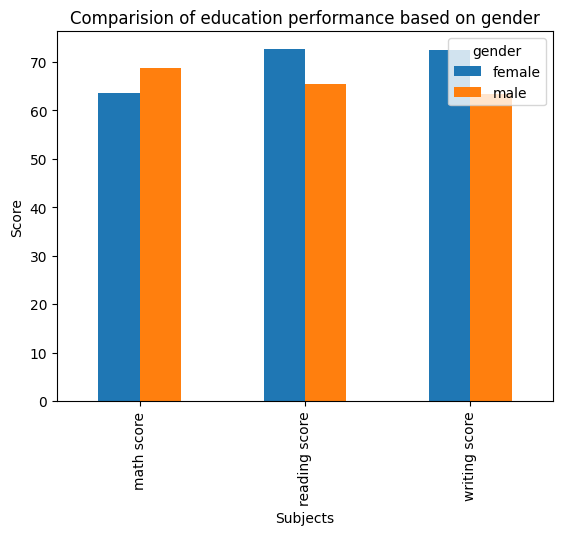

In [4]:
gender_data = gender_data.T
gender_data.plot.bar()
plt.title('Comparision of education performance based on gender')
plt.xlabel('Subjects')
plt.ylabel('Score')
plt.show()

#### As we can see girls are better in reading and writing based tasks and go hand in hand in maths compared to boys

## Overall Performance difference in boys and girls education

In [5]:
gender_data = gender_data.T
gender_data['overall score'] = gender_data[['math score','reading score','writing score']].sum(axis = 1)
gender_data['overall score'] = np.where(gender_data['overall score'],gender_data['overall score']/3,np.nan)
#gender_data

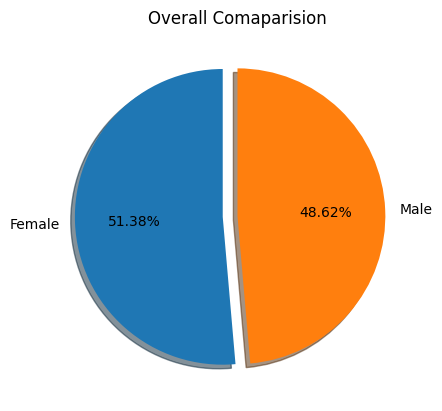

In [6]:
label = ['Female','Male']
plt.pie(gender_data['overall score'], labels=label,startangle=90,explode=[0.1,0], autopct='%1.2f%%',shadow=True)
plt.title('Overall Comaparision')
plt.show()

#### From this observation we can conclude that female students perform quite better than male students.

## Does overall score performance depends on test preparation?


In order to answer this question we need to know about the scores of the students who scored in tests without preparation and with preparation. Let's sum up prepared students and non-prepared students.

In [7]:
preparation_data = Students_data.groupby('test preparation course').sum(numeric_only=True)
preparation_data['math score'] = np.where(preparation_data['math score'],preparation_data['math score']/preparation_data['count'],np.nan)
preparation_data['reading score'] = np.where(preparation_data['reading score'],preparation_data['reading score']/preparation_data['count'],np.nan)
preparation_data['writing score'] = np.where(preparation_data['writing score'],preparation_data['writing score']/preparation_data['count'],np.nan)
preparation_data.drop('count',inplace = True, axis =1)
#preparation_data

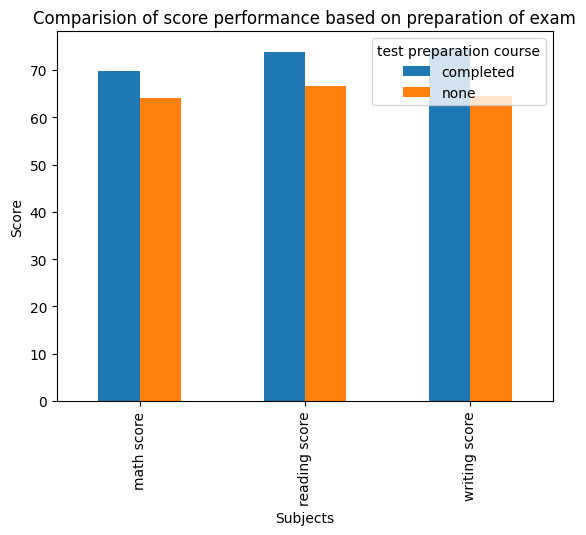

In [8]:
preparation_data = preparation_data.T
preparation_data.plot.bar()
plt.title('Comparision of score performance based on preparation of exam')
plt.xlabel('Subjects')
plt.ylabel('Score')
plt.show()

#### As we can see the bar graph comparision and its very obvious to say that students who prepared for exam have scored better in every exam.

## Let's see overall performance

In [9]:
preparation_data = preparation_data.T
preparation_data['overall score'] = preparation_data[['math score','reading score','writing score']].sum(axis = 1)
preparation_data['overall score'] = np.where(preparation_data['overall score'],preparation_data['overall score']/3,np.nan)
#preparation_data

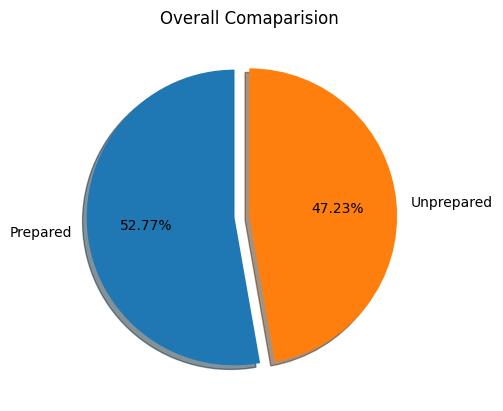

In [10]:
label = ['Prepared','Unprepared']
plt.pie(preparation_data['overall score'], labels=label,startangle=90,explode=[0.1,0], autopct='%1.2f%%',shadow=True)
plt.title('Overall Comaparision')
plt.show()

#### Students who prepared for exam have scored better than non-prepared students.

## Does score of any student depends on parent's education?

In [11]:
parent_data=Students_data.rename(columns={'parental level of education':'parent_education'})
parent_data['parent_education'].replace({'some college':'bachelor\'s degree','some high school':'high school','associate\'s degree':'diploma course'},inplace=True)

In [12]:
parent_data = parent_data.groupby('parent_education').sum(numeric_only=True)
parent_data['math score'] = np.where(parent_data['math score'],parent_data['math score']/parent_data['count'],np.nan)
parent_data['reading score'] = np.where(parent_data['reading score'],parent_data['reading score']/parent_data['count'],np.nan)
parent_data['writing score'] = np.where(parent_data['writing score'],parent_data['writing score']/parent_data['count'],np.nan)
parent_data.drop('count',inplace = True, axis =1)
#parent_data

In [13]:
parent_data['overall score'] = parent_data[['math score','reading score','writing score']].sum(axis = 1)
parent_data['overall score'] = np.where(parent_data['overall score'],parent_data['overall score']/3,np.nan)
#parent_data

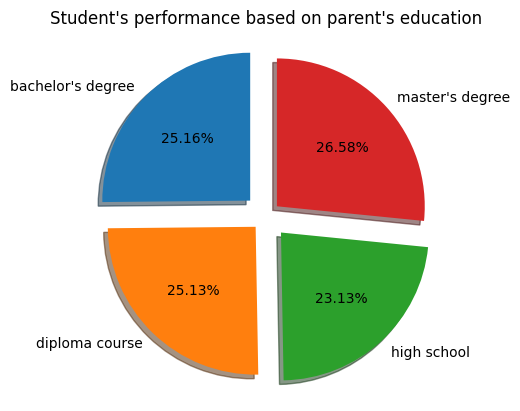

In [14]:
label = ['bachelor\'s degree','diploma course','high school','master\'s degree']
plt.pie(parent_data['overall score'],labels =label, startangle = 90, autopct='%1.2f%%',explode=[0.15,0.1,0.15,0.1],shadow=True)
plt.title('Student\'s performance based on parent\'s education')
plt.show()

#### Here we can see parents who are most educated(master's degree holders) have kids with good performance of grades, while parent's who are least eduacted (high school) have kids who does not perform much better than other students
This could be the reason maybe highschool passed parent have their own small shops or stores where thier kids helps them or maybe those parents lacks to provide enough required resources to thier child so both parents and kids both lacks the resources available in the education domain or maybe they are unaware of those resources.
On the other side students whose parents are well educated have already sustaining a very stable life so students can focus well on their studies as well as those parents are enough aware about the resources available in education domain so they provide all possible resources to their child required for thier betterment of education.

## Does race or caste has any relation with score of the students ?


In [15]:
#Students_data['race/ethnicity'].unique()

In [16]:
race_data = Students_data.groupby('race/ethnicity').sum(numeric_only=True)
race_data['math score'] = np.where(race_data['math score'], race_data['math score']/race_data['count'],np.nan)
race_data['reading score'] = np.where(race_data['reading score'], race_data['reading score']/race_data['count'],np.nan)
race_data['writing score'] = np.where(race_data['writing score'], race_data['writing score']/race_data['count'],np.nan)
race_data.drop('count', inplace=True,axis=1)
race_data['overall score'] = race_data[['math score','reading score','writing score']].sum(axis = 1)
race_data['overall score'] = np.where(race_data['overall score'],race_data['overall score']/3,np.nan)
#race_data

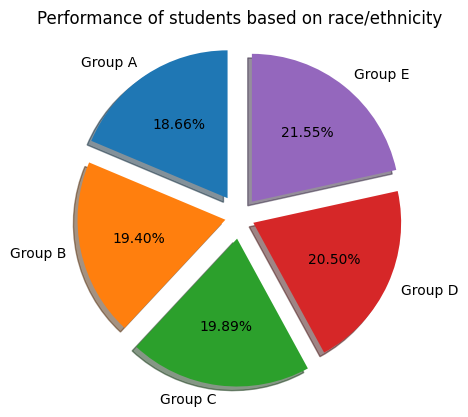

In [17]:
label2 = ['Group A','Group B','Group C','Group D','Group E']
plt.pie(race_data['overall score'],labels = label2, startangle = 90, autopct = '%1.2f%%',explode=[0.15,0.1,0.15,0.1,0.13],shadow=True)
plt.title('Performance of students based on race/ethnicity')
plt.show()

### Group E is quite better in all of categories.
Maybe that group belong to developed area and that particular race have developed over time in that developed area. Group A has least performance, this could be the reason of that particular race belongs to backward backgroung but as per this analysis group A is catching up with other race too.

Overall we can say race/ethnicity of a student is not much related to the score/performace, education is the key to be successful and performance much affacted by resources that we are providing to students